<center><h1>Assignment-2 : Problem Statement 20 (Financial Sentiment Analysis)</center></h1>

## Group No : 62

## Group Member Names: --> [Contribution]-->%

Soumyadipta Maiti (2021sc04237@wilp.bits-pilani.ac.in) --> 100%

## Problem Statement 20 - Financial Sentiment Analysis

Description of Data:

The data set is intended for advancing financial sentiment analysis research

1. Mention suitable assumptions if necessary.(5 Marks)

   A. Download the dataset and Create a dataframe named as fsa, then check the head, info, and describe methods on created dataframe fsa.  (0.5 Mark)<br>
   B. Perform pre-processing steps like Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset.  (0.5 Mark)<br>
    C. Normalize Sentence column by using Stemming or Lemmatization. (0.5 Mark)
    D. Demonstrate use of Sentiwordnet to calculate the senti_score of each of the reviews. (3.5 Marks)

2. Take some sample reviews from the dataset and demonstrate the following: (5 Marks)

    A. Synsets<br>
    B. Synonyms and Antonyms<br>
    C. Hyponym and Hypernym<br>
    D. Wordnet path similarity<br>
    E. Word sense disambiguation

# Table of Contents

1.
A. [Data Acquisition](#1.A-Data-Acquisition)<br>
B. [Text Pre-Processing](#1.B-Text-Pre-Processing)<br>
C. [Normalization of Sentence Columns](#1.C-Normalization-of-Sentence-Column)<br>
D. [Sentiwordnet to calculate the senti_score](#1.D-Sentiwordnet-to-calculate-Senti_Score)

2.
A. [Synsets](#2.A-Synsets)<br>
B. [Synonyms & Antonyms](#2.B-Synonyms-and-Antonyms)<br>
C. [Hyponym & Hypernym](#2.C-Hyponym-and-Hypernym)<br>
D. [Wordnet Path Similarity](#2.D-Wordnet-Path-Similarity)<br>
E. [Word Sense Disambiguation](#2.E-Word-Sense-Disambiguation)

## 1.A Data Acquisition

### 1.A.1 Import Required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import warnings
warnings.filterwarnings(action = 'ignore')

#for Text Pre-Processing
import nltk, string, re
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')

#for Stemming & lemmatization
from nltk.stem import WordNetLemmatizer
import spacy
nlp = spacy.load("en_core_web_sm")
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

#for plotting of WordCloud
from wordcloud import WordCloud, STOPWORDS

# for POS Tagging
from nltk.corpus import brown

# for Sentiwordnet
from nltk.corpus import sentiwordnet as swn
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk import word_tokenize

#for use of WordNet & LESK algo
from nltk.corpus import wordnet
from nltk.wsd import lesk
nltk.download('punkt')
nltk.download('wordnet')

C:\Users\0394D9744\Anaconda3\envs\mtech\Lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\0394D9744\Anaconda3\envs\mtech\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
C:\Users\0394D9744\Anaconda3\envs\mtech\Lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-246-g3d31191b-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\0394D9744\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\0394D9744\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\0394D9744\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### 1.A.2 Download of Dataset

In [3]:
def download(url, output_file):
    
    response = requests.get(url, stream=True)

    if response.status_code == 200:
        with open(output_file, 'wb') as file:
            file.write(response.content)
        print("File downloaded successfully.")
    else:
        print("Failed to download the file.")

[Links to an external site.](https://drive.google.com/file/d/15Wmi3GyCeEX6w8N528S40OYCnRhInH5W/view)

To download a file from Google Drive link, we need to modify the URL to obtain direct download link as provided below: 


In [4]:
# url_fsa = 'https://drive.google.com/file/d/15Wmi3GyCeEX6w8N528S40OYCnRhInH5W/view'
url_fsa = 'https://drive.google.com/uc?id=15Wmi3GyCeEX6w8N528S40OYCnRhInH5W&export=download'

download(url=url_fsa, output_file='FinancialSentimentAnalysis.csv')

File downloaded successfully.


### 1.A.3 Creation of DataFrame

In [5]:
fsa = pd.read_csv('FinancialSentimentAnalysis.csv')

<h4>Reading of CSV File directly from URL</h4>

In [6]:
fsa = pd.read_csv(filepath_or_buffer=url_fsa)

In [7]:
fsa.iloc[0:9]

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral
5,$SPY wouldn't be surprised to see a green close,positive
6,Shell's $70 Billion BG Deal Meets Shareholder ...,negative
7,SSH COMMUNICATIONS SECURITY CORP STOCK EXCHANG...,negative
8,Kone 's net sales rose by some 14 % year-on-ye...,positive


### 1.A.4 Checking of Head, Info & Describe method of DataFrame

In [8]:
fsa.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [9]:
fsa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5842 entries, 0 to 5841
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentence   5842 non-null   object
 1   Sentiment  5842 non-null   object
dtypes: object(2)
memory usage: 91.4+ KB


In [10]:
fsa.describe()

,Sentence,Sentiment
count,5842,5842
unique,5322,3
top,Managing Director 's comments : `` Net sales f...,neutral
freq,2,3130


## 1.B Text Pre-Processing

Removing Punctuations, Numbers, and Special Characters, Stop Words in dataset

In [11]:
fsa_sentence = fsa.iloc[:,0]

### 1.B.1 Word Tokenizer

In [12]:
def Word_Tokenizer(sentence):
    words = word_tokenize(sentence)
    return words

### 1.B.2 Removal of Punctuations from Words

In [13]:
def Remove_Punctuation(words):
    words_wo_punc = [w for w in words if w not in string.punctuation]
    return words_wo_punc

### 1.B.3 Removal of Stop Words

In [14]:
def Remove_StopWords(words):
    english_stop_words = set(stopwords.words('english'))
    words_wo_stopwords = [w for w in words if w not in english_stop_words]
    return words_wo_stopwords

### 1.B.4 Text Pre-Processing & comparision with a example

In [15]:
def Text_Preprocessing(sentences):
    sent_lower = sentences.lower()
    words_sent = Word_Tokenizer(sent_lower)
    words_wo_punc = Remove_Punctuation(words_sent)
    words_wo_punc_stopwrd = Remove_StopWords(words_wo_punc)
    return words_wo_punc_stopwrd

In [16]:
print(f'Original 1st Sentence from dataSet : \n\n{fsa_sentence[0]}')

Original 1st Sentence from dataSet : 

The GeoSolutions technology will leverage Benefon 's GPS solutions by providing Location Based Search Technology , a Communities Platform , location relevant multimedia content and a new and powerful commercial model .


In [17]:
print(f'Processed Version of above Sentence : \n\n{Text_Preprocessing(fsa_sentence[0])}')

Processed Version of above Sentence : 

['geosolutions', 'technology', 'leverage', 'benefon', "'s", 'gps', 'solutions', 'providing', 'location', 'based', 'search', 'technology', 'communities', 'platform', 'location', 'relevant', 'multimedia', 'content', 'new', 'powerful', 'commercial', 'model']


## 1.C Normalization of Sentence Column

Lemmatization is preferred for Sentiment analysis as context meaning is considered in Lemmatization wrt Stemming

### 1.C.1 Stemming

In [18]:
def Stemming(words):
    porter_stemmer = PorterStemmer()
    words_stemmed = porter_stemmer.stem(token)
    return words_stemmed

### 1.C.2 Lemmatization

Lemmatization via Spacy is returning better result than WordNet Lemmatizer in our DataSet. So using Spacy's in-built Lemmatizer

In [19]:
def get_wordnet_POS(word):
    tag_dict = {'NOUN': 'n',
            'VERB': 'v',
            'ADJ': 'a',
            'ADV': 'r'}
    word_pos = nltk.pos_tag(tokens=['Cat'],tagset='universal')
    pos_word = tag_dict.get(word_pos[0][1])
    return pos_word

In [20]:
def Lemmatization_WordNet(words):
    word_token = []
    wordnet_lemmatizer = WordNetLemmatizer()

    for word in words:
        pos_word = get_wordnet_POS(word)
        pos_1 = wordnet_lemmatizer.lemmatize(word, pos=pos_word)
        word_token.append(pos_1)
    return word_token

In [21]:
def Lemmatization_spacy(sent):
    doc = nlp(sent)
    sent_lemma = ''
    for token in doc:
        sent_lemma = sent_lemma + token.lemma_ + ' '
    return sent_lemma

In [22]:
print(f'Original 1st Sentence from dataSet : \n\n{fsa_sentence[17]}')
print(f'\n\nLemmatized Version of Above Sentence : \n\n{Lemmatization_spacy(fsa_sentence[17])}')

Original 1st Sentence from dataSet : 

According to L+ñnnen Tehtaat 's CEO Matti Karppinen , the company aims to deliver fish products to its customers a day earlier than it currently does .


Lemmatized Version of Above Sentence : 

accord to l+ñnnen Tehtaat 's ceo Matti Karppinen , the company aim to deliver fish product to its customer a day early than it currently do . 


### Updation of DataFrame after Pre-processing

#### Preprocessed sentence should be included in fsa data frame as ‘cleaned_sentence’.

Preprocessing of Sentence is performed by following sequences: <br> 
- Text_Preprocessing:
  - Lowercase Conversion
  - Word Tokenization
  - Removal of Punctuations
  - Removal of StopWords
  
- Spacy Lemmatization

In [23]:
fsa_sentence = fsa.iloc[:,0]
fsa_cleaned = []

for sentence in fsa_sentence:
    sent_pre = Text_Preprocessing(sentence)
#     sent_lemma = Lemmatization_WordNetn(sent_pre)
#     sent_lemma = ' '.join(sent_lemma)
    
    sent_spacy = ''
    for word in sent_pre:
        sent_spacy = sent_spacy + word + ' '
    sent_lemma = Lemmatization_spacy(sent_spacy)
    
    fsa_cleaned.append(sent_lemma)
    
fsa['cleaned_sentence'] = fsa_cleaned

In [24]:
fsa[1:5]

,Sentence,Sentiment,cleaned_sentence
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low 1.50 2.50 bk real possibility
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta 's net sale doubl...
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnish - russian chamber commerce majo...
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sell remain 22.4 percent s...


#### Plotting of Word Cloud for Sentence

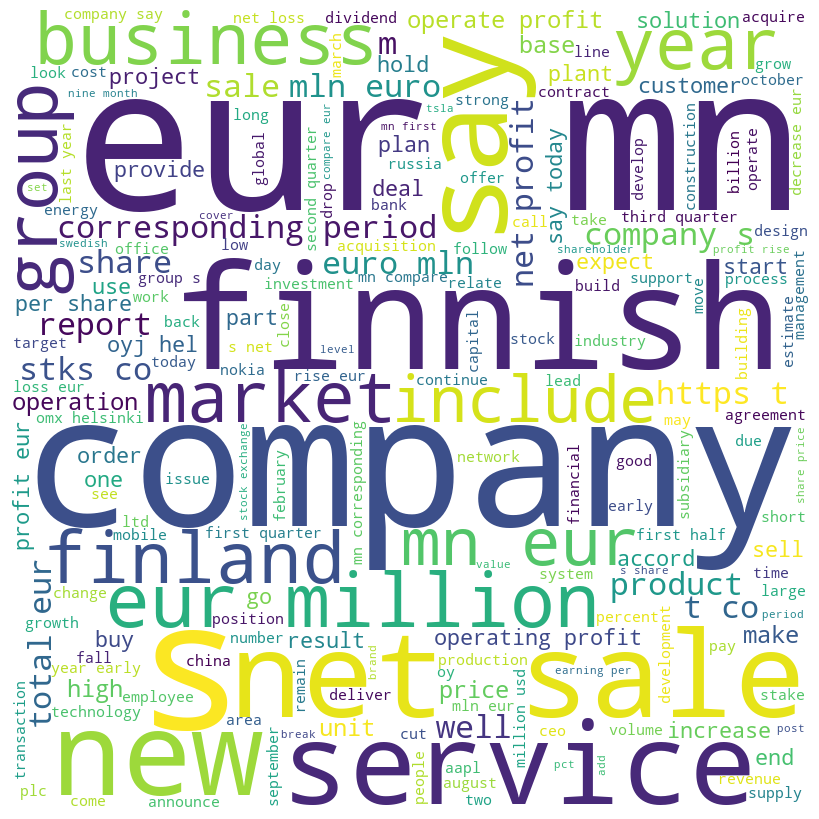

In [25]:
stop_words = set(STOPWORDS)
all_words = ''

for sentence in fsa.iloc[:,2]:
    words = sentence.split()
    all_words += ' '.join(words)+' '
    
word_cloud = WordCloud(width=800, height=800, background_color='white', 
                      stopwords=stop_words, min_font_size=10).generate(all_words)

# Plot WordCloud Image
plt.figure(figsize=(8,8), facecolor=None)
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## 1.D Sentiwordnet to calculate Senti_Score 

Demonstrate use of Sentiwordnet to calculate the senti_score of each of the reviews.

__SentiWordNet__ is a lexical resource that combines elements of both WordNet and sentiment analysis. It is designed to associate English words with sentiment scores, indicating the degree of positivity, negativity, or neutrality of each word's meaning. In SentiWordNet, the term __Senti_Score__ refers to the sentiment score assigned to a word sense or synset. Each word sense in SentiWordNet is associated with three numerical sentiment scores:

* __Positive Score:__ This score represents the degree of positive sentiment associated with the word sense. It typically ranges from 0 (completely negative) to 1 (completely positive).

* __Negative Score:__ This score represents the degree of negative sentiment associated with the word sense. Like the positive score, it usually ranges from 0 (completely positive) to 1 (completely negative).

* __Objectivity Score:__ This score indicates how objective or neutral the word sense is. It ranges from 0 (completely subjective) to 1 (completely objective).

In [26]:
nltk.download("sentiwordnet")
nltk.download("vader_lexicon")

[nltk_data] Downloading package sentiwordnet to
[nltk_data]     C:\Users\0394D9744\AppData\Roaming\nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\0394D9744\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

__calculate_sentiwordnet_score_sentence(sent) Function:__

  * Input: Takes a single sentence (a review or any piece of text) as its input.
  * Processing:
        Tokenizes the input sentence into words.
        For each word in the sentence, it attempts to find sentiment scores using SentiWordNet.
        SentiWordNet provides sentiment scores in the form of Positive (POS) and Negative (NEG) scores for each word.
        The function aggregates the POS and NEG scores for each word in the sentence to compute an overall sentiment score for the input sentence.
  * Output: Returns the computed sentiment score for the input sentence.

In [27]:
def calculate_sentiwordnet_score_sentence(sent):
    sia = SentimentIntensityAnalyzer()
    tokens = word_tokenize(sent)
    sentiment_score_sent = 0

    for token in tokens:
        synsets = list(swn.senti_synsets(token))
        if synsets:
            # We'll use the first synset found for simplicity
            synset = synsets[0]
            sentiment_score_sent += synset.pos_score() - synset.neg_score()

    return sentiment_score_sent

__calculate_sentiwordnet_scores_dataset(reviews) Function:__

   * Input: Takes a list of reviews (or a list of sentences) as its input.
   * Processing:
        For each review in the list, it calls the calculate_sentiwordnet_score function to compute sentiment scores.
        It collects and stores the sentiment scores for all the reviews in a list.
   * Output: Returns a list of sentiment scores, one for each review in the input list.

In [28]:
def calculate_sentiwordnet_scores_dataset(reviews):
    scores = []
    for review in reviews:
        senti_score = calculate_sentiwordnet_score_sentence(review)
        scores.append(senti_score)
    return scores

In [29]:
fsa_new = fsa.copy()
reviews = fsa_new['cleaned_sentence']
senti_scores = []
senti_scores = calculate_sentiwordnet_scores_dataset(reviews)
fsa_new['senti_score'] = senti_scores

In [30]:
print(f'Updated dataFrame after inclusion of Sentiment Scores for individual Review :')
fsa_new

Updated dataFrame after inclusion of Sentiment Scores for individual Review :


,Sentence,Sentiment,cleaned_sentence,senti_score
0,The GeoSolutions technology will leverage Bene...,positive,geosolutions technology leverage benefon 's gp...,0.625
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative,esi low 1.50 2.50 bk real possibility,0.000
2,"For the last quarter of 2010 , Componenta 's n...",positive,last quarter 2010 componenta 's net sale doubl...,-0.250
3,According to the Finnish-Russian Chamber of Co...,neutral,accord finnish - russian chamber commerce majo...,0.000
4,The Swedish buyout firm has sold its remaining...,neutral,swedish buyout firm sell remain 22.4 percent s...,0.000
...,...,...,...,...
5837,RISING costs have forced packaging producer Hu...,negative,rise cost force packaging producer huhtamaki a...,0.250
5838,Nordic Walking was first used as a summer trai...,neutral,nordic walking first use summer training metho...,0.125
5839,"According shipping company Viking Line , the E...",neutral,accord ship company vike line eu decision sign...,0.750
5840,"In the building and home improvement trade , s...",neutral,build home improvement trade sale decrease 22....,0.375


# 2. Take some sample reviews from Dataset & Demonstrate followings:

* Synsets<br>
* Synonyms and Antonyms<br>
* Hyponym and Hypernym<br>
* Wordnet path similarity<br>
* Word sense disambiguation<br>

The terms listed above are all related to WordNet, a lexical database used for natural language processing & computational linguistics. Let's briefly explain each of these concepts:

## 2.A Synsets

A synset, short for "synonym set," is a group of words in WordNet that are synonymous or have closely related meanings. Synsets represent different word senses for a given term. For example, the word "bank" in WordNet has multiple synsets, each representing a different sense (e.g., financial institution, riverbank).

In [31]:
# A. Synsets

def synset_display(reviews):
    for review in reviews:
        tokens = nltk.word_tokenize(review)
        for token in tokens:
            synsets = wordnet.synsets(token)
            if synsets:
                print(f"\nToken: {token}")
                for synset in synsets:
                    print(f"  Synset: {synset.name()} - Meaning: {synset.definition()}")
        print("\n")

## 2.B Synonyms and Antonyms

WordNet provides information about synonyms (words with similar meanings) and antonyms (words with opposite meanings) for words within its synsets. This information is valuable for various NLP tasks, including word sense disambiguation and sentiment analysis.

In [32]:
# B. Synonyms and Antonyms

def synonyms_antonyms_display(reviews):
    for review in reviews:
        tokens = nltk.word_tokenize(review)
        for token in tokens:
            synsets = wordnet.synsets(token)
            if synsets:
                print(f"\n\nToken: {token}")
                for synset in synsets:
                    print(f"\nSynset: {synset.name()}")
                    print(f"  Synonyms: {', '.join([lemma.name() for lemma in synset.lemmas()])}")
                    for lemma in synset.lemmas():
                        antonyms = lemma.antonyms()
                        if antonyms:
                            print(f"  Antonyms: {', '.join([antonym.name() for antonym in antonyms])}")
        print("\n")

## 2.C Hyponym and Hypernym

In WordNet, the terms "hyponym" and "hypernym" represent the relationships between synsets. A hyponym is a more specific term that is a subtype of a more general term, known as the hypernym. For example, "rose" is a hyponym of "flower" (rose is a type of flower), so "flower" is the hypernym of "rose."

In [33]:
# C. Hyponym and Hypernym

def hyponym_hypernym_display(reviews):
    for review in reviews:
        tokens = nltk.word_tokenize(review)
        for token in tokens:
            synsets = wordnet.synsets(token)
            if synsets:
                print(f"\n\nToken: {token}")
                for synset in synsets:
                    print(f"\nSynset: {synset.name()}")
                    hypernyms = synset.hypernyms()
                    if hypernyms:
                        print(f"  Hypernyms: {', '.join([hypernym.name() for hypernym in hypernyms])}")
                    hyponyms = synset.hyponyms()
                    if hyponyms:
                        print(f"  Hyponyms: {', '.join([hyponym.name() for hyponym in hyponyms])}")
        print("\n")

## 2.D Wordnet Path Similarity

WordNet Path Similarity is a metric used to measure the similarity between two words or synsets in WordNet. It calculates the length of the shortest path between two synsets in the WordNet hierarchy (measured in terms of the number of hypernym relationships) and uses this information to compute a similarity score. Shorter paths indicate higher similarity.

__wordnet_path_similarity_display function :__

* We tokenize the input review into words.
* We calculate the WordNet path similarity score for each pair of words using nested loops.
* We keep track of the most relevant word pair and their highest similarity score as we iterate through the pairs.
* Finally, we print the two most relevant words and their similarity score.

In [34]:
# D. Wordnet path similarity

def wordnet_path_similarity_display(reviews):
    # Initialize variables to store the most relevant words and their similarity scores
    most_relevant_pairs = []
    highest_similarity_score = 0

    for review in reviews:
        # Tokenize the review into words
        tokens = nltk.word_tokenize(review)

        # Initialize variables for the current review
        current_most_relevant_word1 = ""
        current_most_relevant_word2 = ""
        current_highest_similarity_score = 0

        # Calculate WordNet path similarity for each pair of words in the review
        for i in range(len(tokens)):
            for j in range(i + 1, len(tokens)):
                word1 = tokens[i]
                word2 = tokens[j]

                # Get synsets for each word
                synsets1 = wordnet.synsets(word1)
                synsets2 = wordnet.synsets(word2)

                # Calculate path similarity for each pair of synsets
                max_similarity = 0
                for synset1 in synsets1:
                    for synset2 in synsets2:
                        similarity = synset1.path_similarity(synset2)
                        if similarity is not None and similarity > max_similarity:
                            max_similarity = similarity
                            current_most_relevant_word1 = word1
                            current_most_relevant_word2 = word2

                # Check if the similarity score is higher than the current highest
                if max_similarity > current_highest_similarity_score:
                    current_highest_similarity_score = max_similarity

        # Check if the highest similarity score for the current review is higher
        # than the overall highest similarity score
        if current_highest_similarity_score > highest_similarity_score:
            highest_similarity_score = current_highest_similarity_score
            most_relevant_pairs = [(current_most_relevant_word1, current_most_relevant_word2)]
        elif current_highest_similarity_score == highest_similarity_score:
            most_relevant_pairs.append((current_most_relevant_word1, current_most_relevant_word2))

    # Print all pairs of most relevant words and their similarity score
    for pair in most_relevant_pairs:
        print(f"Most Relevant Word 1: {pair[0]}")
        print(f"Most Relevant Word 2: {pair[1]}")
        print(f"Highest Similarity Score: {highest_similarity_score}\n")

## 2.E Word Sense Disambiguation

Word Sense Disambiguation (WSD) is a problem in NLP that involves determining the correct sense or meaning of a word within a given context. Since many words have multiple senses (as represented by different synsets in WordNet), WSD algorithms aim to select the most appropriate sense for a word in a specific sentence or document. WordNet is often used as a resource in WSD tasks to help disambiguate word senses.

Various algorithms & techniques have been developed for word sense disambiguation. Here are some important approaches and algorithms used for WSD:

* __Lesk Algorithm:__ The Lesk algorithm uses the idea of finding the sense of a word that has the most common words (or context) in common with its surrounding words in a given sentence. It calculates the overlap between word definitions and the words in the context.

* __Supervised Machine Learning:__ This approach involves training machine learning models, such as Naive Bayes, Support Vector Machines (SVM), or neural networks, on labeled training data where words are disambiguated into their correct senses. Features for the model can include words in the context, part-of-speech tags, and other linguistic features.

* __Unsupervised Machine Learning:__ Unsupervised methods cluster contexts of a word and assign senses to each cluster. Techniques like clustering and topic modeling can be used for this purpose.

* __Knowledge-Based Methods:__ Knowledge-based WSD methods use external lexical resources like WordNet, which provides sense definitions and relationships between words. These methods leverage semantic networks and graph algorithms to disambiguate words.

* __Contextual Embeddings:__ Pre-trained contextual word embeddings models like BERT, GPT, and ELMo have been used for WSD by encoding the context of the target word and selecting the sense that best fits the context based on embeddings.

__We have used Simple Lesk Algorithm for WSD as demonstrated below:__

__Function disambiguate_and_print_senses(sentence):__

* This function takes a sentence as input, where we want to disambiguate senses of open class (content) words.
* It defines a list of open_class_tags, which includes part-of-speech (POS) tags associated with open class words. These tags cover nouns, verbs, adjectives, and adverbs.
* It then tokenizes input sentence into words using nltk.word_tokenize and assigns POS tags to each word using nltk.pos_tag.

* Iteration through Words:<br>
The function iterates through each word in sentence along with its associated POS tag.<br>

* POS Tag Filtering:<br>
Within the loop, it checks if the POS tag of the word (tag) is included in the open_class_tags list. If the tag matches one of the open class tags, it proceeds with word sense disambiguation.

* Word Sense Disambiguation:<br>
For each open class word, it performs word sense disambiguation using the Lesk algorithm with the lesk() function provided by NLTK. This algorithm analyzes the context of the word within the sentence and selects the most appropriate sense (synset) from WordNet.

If a synset is found (i.e., if synset is not None), it proceeds to print the information.

* Printing Information:<br>
For each ambiguous open class word, it prints the following information:<br>
The original word itself (word).<br>
The selected Synset (synset.name()), which represents the disambiguated sense.<br>
The meaning of the Synset (synset.definition()), providing a brief description of that sense.<br>

__lesk(sentence, word):__

It implements word sense disambiguation using the Lesk algorithm as below:<br>
* It takes a sentence and a target word as input. 
* The algorithm considers the context of the word within the sentence, looking at surrounding words and their meanings. 
* It also takes into account the part-of-speech (POS) of the word. 
* By comparing this context to the definitions and examples of each sense (synset) of the word in WordNet, it selects the most appropriate sense. 
* The result is the chosen Synset that best matches the context of the word in the sentence, providing a disambiguated sense for that word in the given context.

In [35]:
# Function to disambiguate and print senses for open words in the sentence
def disambiguate_and_print_senses(reviews):
    
    for review in reviews:
        # Tokenize the review into words
        tokens = nltk.word_tokenize(review)
#         words = word_tokenize(sentence)
        open_class_tags = ["NN", "NNS", "VB", "VBD", "VBG", "VBN", "VBP", "VBZ", "JJ", "JJR", "JJS", "RB", "RBR", "RBS"]
        tagged_words = nltk.pos_tag(tokens)

        for word, tag in tagged_words:
            if tag in open_class_tags:
                # Perform word sense disambiguation using the Lesk algorithm
                synset = lesk(sentence, word)

                if synset:
                    print(f"Word: {word}")
                    print(f"  Synset: {synset.name()} - Meaning: {synset.definition()}")
                    print()

These above concepts are fundamental to understanding and working with WordNet and are widely used in various NLP applications, including machine translation, information retrieval, and text summarization, among others.

#### Let's test above concepts on randomly selected n seteneces from given Dataset:

We are performing all above WordSense Concepts on top of Pre-processed Sentence instead of original one.

In [36]:
# Randomly select n reviews
random_reviews = []
random_reviews_org = []
random_reviews_processed = []
#change value of n to select n random sentence(s) from Dataset
random_reviews = fsa_new[['Sentence','cleaned_sentence']].sample(n=1) 

In [38]:
random_reviews_org = []
random_reviews_processed = []

for index, row in random_reviews.iterrows():
    original_sentence = row['Sentence']
    cleaned_sentence = row['cleaned_sentence']
    
    random_reviews_org.append(original_sentence)
    random_reviews_processed.append(cleaned_sentence)
    
    print(f'Original Sentence : \n {random_reviews_org} \n\n')
    
    print('*********************************************************************************** \n')
    
    print(f'Pre-processed Sentence : \n {cleaned_sentence} \n\n')
    
    print('*********************************************************************************** \n')

    print(f'Synsets for above Sentence : \n\n')
    synset_display(random_reviews_processed)
    
    print('*********************************************************************************** \n')

    print(f'Synonyms & Antonyms of different words from above Sentence : \n')
    synonyms_antonyms_display(random_reviews_processed)
    
    print('*********************************************************************************** \n')

    print(f'Hyponym & Hypernym of different words from above Sentence : \n')
    hyponym_hypernym_display(random_reviews_processed)
    
    print('*********************************************************************************** \n')

    print(f'Wordnet Path Similarity between two most relevant words in above Sentence : \n')
    wordnet_path_similarity_display(random_reviews_processed)
    
    print('*********************************************************************************** \n')

#     print(f'Word Sense Disambiguation between two most relevant words in above Sentence : \n')
#     word_sense_disambiguation(random_reviews_processed)
    
    print(f'Word Sense Disambiguation of ambiguous words in above Sentence : \n')
    disambiguate_and_print_senses(random_reviews_processed)
    
    print('*********************************************************************************** \n')
    print('*********************************************************************************** \n')

Original Sentence : 
 ['The plant would use palm oil certified by the Roundtable on Sustainable Palm Oil ( RSPO ) .'] 


*********************************************************************************** 

Pre-processed Sentence : 
 plant would use palm oil certify roundtable sustainable palm oil rspo  


*********************************************************************************** 

Synsets for above Sentence : 



Token: plant
  Synset: plant.n.01 - Meaning: buildings for carrying on industrial labor
  Synset: plant.n.02 - Meaning: (botany) a living organism lacking the power of locomotion
  Synset: plant.n.03 - Meaning: an actor situated in the audience whose acting is rehearsed but seems spontaneous to the audience
  Synset: plant.n.04 - Meaning: something planted secretly for discovery by another
  Synset: plant.v.01 - Meaning: put or set (seeds, seedlings, or plants) into the ground
  Synset: implant.v.01 - Meaning: fix or set securely or deeply
  Synset: establish.v.02 - 